In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame

from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from eis_preprocessing import eis_dataframe_from_csv
from eis_preprocessing import process_batch_element_f
from eis_preprocessing import process_batch_element_zreal
from eis_preprocessing import process_batch_element_zimag

from utils import plot_freq_range
from utils import umap_plots

/Users/joachim/opt/anaconda3/envs/eis-battmen/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the csv into a data frame.
df = eis_dataframe_from_csv("data/train_data.csv")
df.shape

(7462, 4)

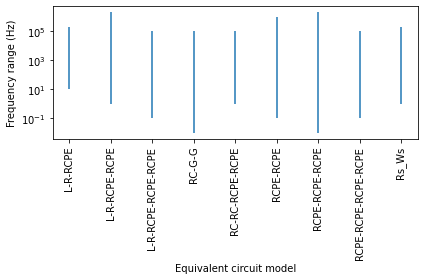

['L-R-RCPE' 'L-R-RCPE-RCPE' 'L-R-RCPE-RCPE-RCPE' 'RC-G-G'
 'RC-RC-RCPE-RCPE' 'RCPE-RCPE' 'RCPE-RCPE-RCPE' 'RCPE-RCPE-RCPE-RCPE'
 'Rs_Ws'] [ 3 12  0  5  1  6  4 10 13]
Maximal minimum freq: 10.0, minimal maximum freq: 100000.0


In [3]:
plot_freq_range(df, save=0)

In [4]:
## Interpolate onto the largest frequency union to prevent data leakage
interpolated_basis = np.geomspace(10, 1e5, num=30)

df["f"] = df.apply(lambda x: process_batch_element_f(interpolated_basis), axis=1)
df["zreal"] = df.apply(
    lambda x: process_batch_element_zreal(x.freq, x.Z, interpolated_basis), axis=1
)
df["zimag"] = df.apply(
    lambda x: process_batch_element_zimag(x.freq, x.Z, interpolated_basis), axis=1
)

# Sort the data frame to get the circuit names in alphabetical order
df_sorted = df.sort_values(by=["Circuit"])

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


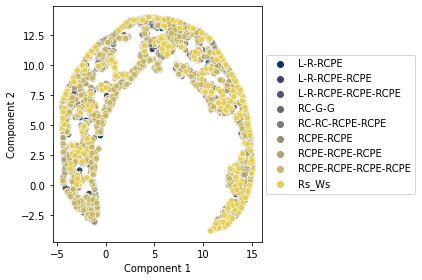

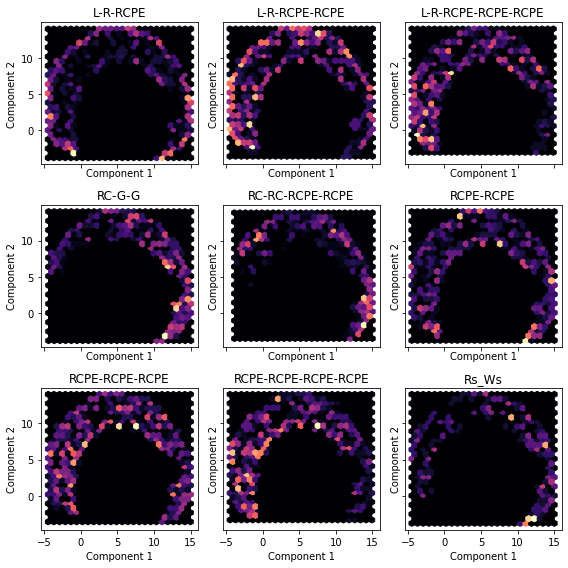

In [5]:
# Umap random state fixed (plots differ slightly from publication, because the seed was previously not fixed).
umap_plots(df_sorted)